In [1]:
import h5py
import matplotlib.pyplot as plt
import tensorflow 
from sklearn.model_selection import train_test_split
# from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

#import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.optimizers import Adam 
#from tensorflow.keras import initializers
from sklearn.metrics import accuracy_score#confusion_matrix, 
#import seaborn as sns
from sklearn.model_selection import GridSearchCV
#from keras.models import Sequential
#from keras.layers import Dense
# from tensorflow.keras.layers.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier


In [2]:
import tensorflow as tf; print(tf.__version__)

2.14.0


In [3]:
#  Part2.1a Read the .h5 file and assign to a variable
h5_file = h5py.File('Autonomous_Vehicles_SVHN_single_grey1 (1).h5', 'r')


In [4]:
# Part2.1b-Print all the keys from the .h5 file.
print("Keys in the HDF5 file:", list(h5_file.keys()))


Keys in the HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [5]:
import h5py
#  Part2.1a Read the .h5 file and assign to a variable
# Open the HDF5 file in read mode
h5_file = h5py.File('Autonomous_Vehicles_SVHN_single_grey1 (1).h5', 'r')

# Part2.1b-Print all the keys from the .h5 file.
print("Keys in the HDF5 file:", list(h5_file.keys()))

# Part2.1c-Split the data into X_train, X_test, Y_train, Y_test
# Read data for each set
X_train = h5_file['X_train'][()]
y_train = h5_file['y_train'][()]

X_val = h5_file['X_val'][()]
y_val = h5_file['y_val'][()]

X_test = h5_file['X_test'][()]
y_test = h5_file['y_test'][()]

# Close the HDF5 file
h5_file.close()
# Part2.2a-Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
# Print the shapes of the loaded datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Keys in the HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_val shape: (60000, 32, 32)
y_val shape: (60000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


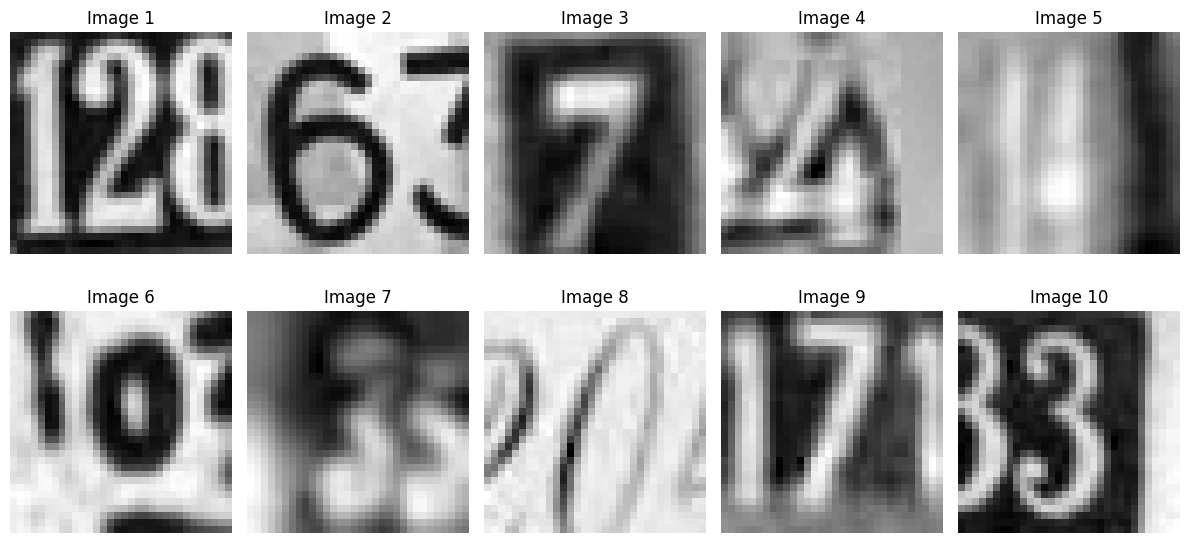

In [6]:
# Part2.2b-Visualise first 10 images in train data and print its corresponding labels.
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Assuming the images are grayscale
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

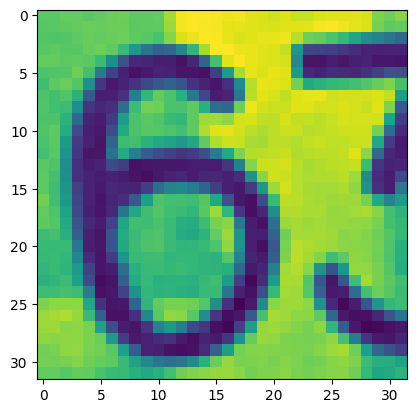

Label:  6


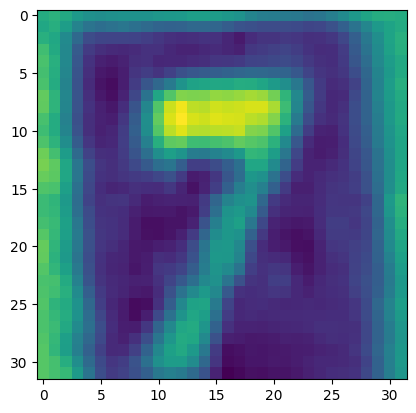

Label:  7


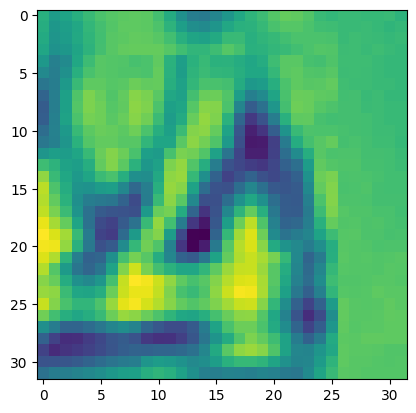

Label:  4


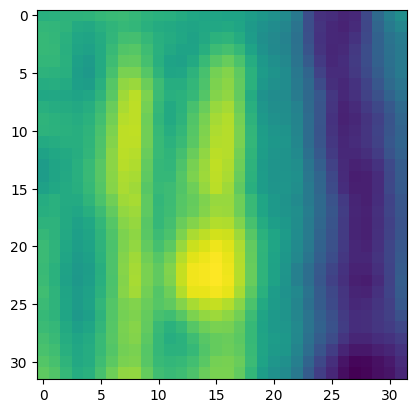

Label:  4


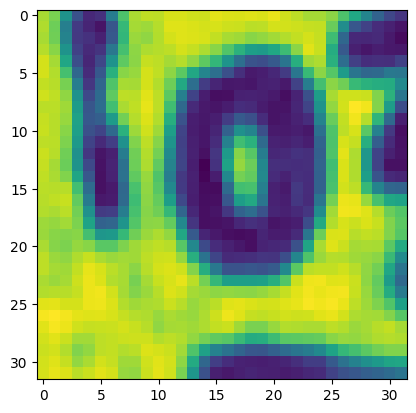

Label:  0


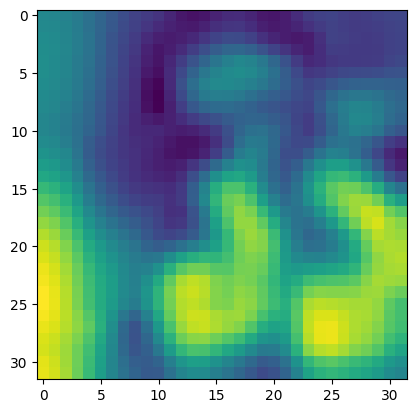

Label:  3


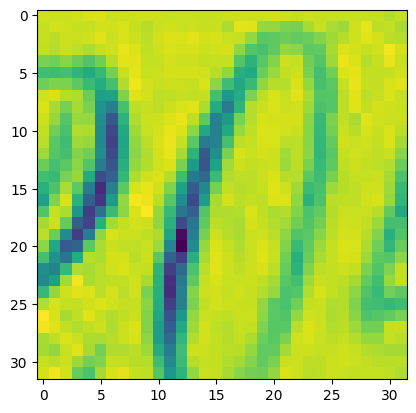

Label:  0


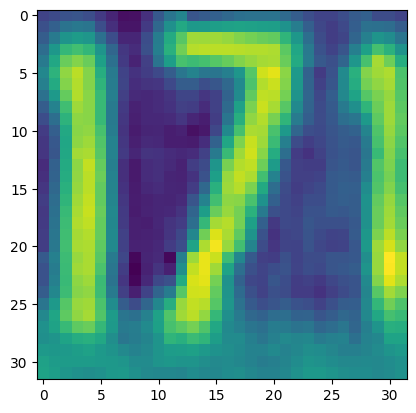

Label:  7


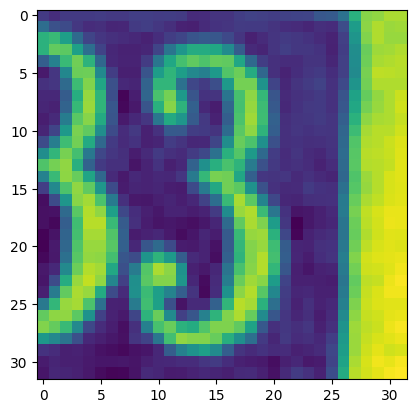

Label:  3


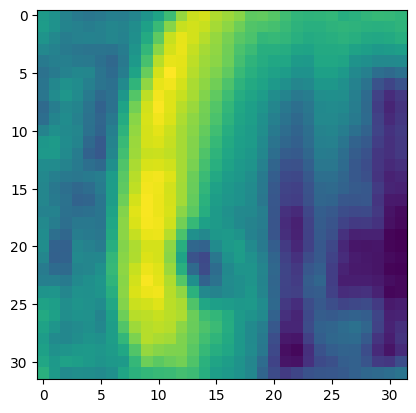

Label:  1


In [7]:
# Part2.2b-Visualise first 10 images in train data and print its corresponding labels.
for i in range(1,11):
    plt.imshow(X_train[i])    # show first number in the dataset
    plt.show()
    print('Label: ', y_train[i])

In [8]:
X_train.shape[0]

42000

In [9]:
# Part2.2c-Reshape all the images with appropriate shape update the data in same variable
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [10]:
# Part2.2d preprocessingPart2.2d-Normalise the images i.e. Normalise the pixel values.
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape ,y_val.shape)


(42000, 1024) (18000, 1024) (42000,) (18000,) (60000, 1024) (60000,)


In [12]:
#  Part2.2e-Transform Labels into format acceptable by Neural Network
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [13]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
# Part2.2f-Print total Number of classes in the Dataset
y_train.shape[1]

10

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [16]:
# Part2.3a-Design a Neural Network to train a classifier

model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)


Epoch 1/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3108 - accuracy: 0.1040
Epoch 2/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3046 - accuracy: 0.1049
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3030 - accuracy: 0.1072
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3023 - accuracy: 0.1075
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3018 - accuracy: 0.1106
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3013 - accuracy: 0.1136
Epoch 7/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3009 - accuracy: 0.1142
Epoch 8/100
210/210 [==============================] - 1s 6ms/step - loss: 2.3005 - accuracy: 0.1164
Epoch 9/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3001 - accuracy: 0.1169
Epoch 10/100
210/210 [==============================] - 1s 5ms/step - loss: 2.2996 - accura

In [18]:
results = model.evaluate(X_test, y_test)


563/563 [==============================] - 2s 2ms/step - loss: 2.1757 - accuracy: 0.2620


In [19]:
print('Test accuracy: ', results[1])


Test accuracy:  0.2619999945163727


In [20]:
from keras.layers import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape = (1024,)))  ### Batch_Norm Layer
model.add(Dense(1024, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dense(1048))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 activation_5 (Activation)   (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 2048)              2099200   
                                                                 
 activation_6 (Activation)   (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 4096)              8392704   
                                                      

In [25]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [26]:
# history = model.fit(X_train, y_train, validation_split=0.2,batch_size=200, epochs = 150, verbose = 2,callbacks=callbacks)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=100, epochs = 10, verbose = 2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
420/420 - 41s - loss: 2.1852 - accuracy: 0.3387 - val_loss: 2.1592 - val_accuracy: 0.3661 - lr: 0.0010 - 41s/epoch - 97ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
420/420 - 53s - loss: 2.1387 - accuracy: 0.3736 - val_loss: 2.1068 - val_accuracy: 0.3993 - lr: 0.0010 - 53s/epoch - 127ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
420/420 - 37s - loss: 2.0828 - accuracy: 0.4058 - val_loss: 2.0457 - val_accuracy: 0.4302 - lr: 0.0010 - 37s/epoch - 87ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
420/420 - 55s - loss: 2.0168 - accuracy: 0.4316 - val_loss: 1.9730 - val_accuracy: 0.4406 - lr: 0.0010 - 55s/epoch - 131ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
420/420 - 55s - loss: 1.9418 - accuracy: 0.4566 - val_loss: 1.8926 - val_accuracy: 0.4674 - lr: 0.0010 - 55s/epoch - 132ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
420/420 - 54s - loss: 1.8593 - accurac

In [27]:
y_pred=model.predict(X_test)


563/563 [==============================] - 5s 9ms/step


In [28]:
import numpy as np

In [29]:
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [30]:
y_pred[0]

array([0.1480319 , 0.04642994, 0.10264603, 0.06718597, 0.05333971,
       0.07624764, 0.11613975, 0.1080512 , 0.1387973 , 0.14313062],
      dtype=float32)

In [31]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
 tensorflow.argmax(y_test, axis=1)

<tf.Tensor: shape=(18000,), dtype=int64, numpy=array([1, 7, 2, ..., 7, 9, 2], dtype=int64)>

In [33]:
from sklearn.metrics import classification_report
print(classification_report( tensorflow.argmax(y_test, axis=1),y_pred_final))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1814
           1       0.55      0.70      0.62      1828
           2       0.67      0.57      0.62      1803
           3       0.53      0.54      0.54      1719
           4       0.65      0.74      0.69      1812
           5       0.59      0.52      0.55      1768
           6       0.54      0.63      0.58      1832
           7       0.64      0.71      0.68      1808
           8       0.69      0.34      0.46      1812
           9       0.56      0.56      0.56      1804

    accuracy                           0.59     18000
   macro avg       0.60      0.59      0.59     18000
weighted avg       0.60      0.59      0.59     18000



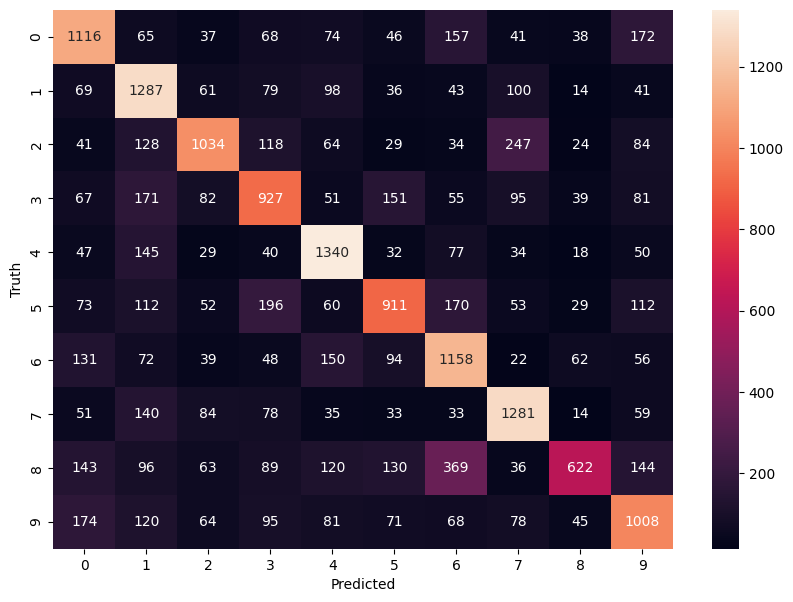

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix( tensorflow.argmax(y_test, axis=1),y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [35]:
index = 0
misclassified_images = []
for label, predict in zip( tensorflow.argmax(y_test, axis=1), y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[0, 6, 7, 8, 10, 11, 14, 15, 17, 18, 19, 23, 24, 26, 27, 28, 29, 36, 40, 46, 50, 51, 54, 59, 64, 67, 68, 71, 75, 76, 77, 78, 79, 83, 85, 88, 89, 90, 92, 93, 97, 98, 100, 101, 102, 103, 108, 109, 114, 115, 120, 125, 132, 137, 138, 141, 145, 149, 150, 151, 152, 154, 155, 156, 158, 159, 160, 163, 170, 173, 176, 182, 183, 185, 186, 188, 189, 190, 191, 193, 194, 197, 203, 206, 207, 209, 210, 211, 219, 222, 223, 224, 227, 228, 230, 232, 235, 236, 239, 244, 246, 251, 252, 253, 258, 262, 267, 268, 270, 274, 278, 279, 285, 286, 288, 290, 299, 300, 301, 302, 303, 304, 305, 306, 307, 310, 311, 314, 319, 323, 324, 330, 331, 332, 336, 339, 342, 346, 347, 348, 350, 351, 353, 355, 356, 358, 361, 363, 370, 371, 372, 374, 375, 378, 383, 388, 389, 396, 398, 400, 402, 403, 404, 408, 413, 415, 418, 421, 426, 427, 429, 430, 432, 434, 436, 437, 438, 440, 446, 448, 451, 454, 457, 464, 469, 470, 474, 480, 481, 482, 484, 485, 489, 491, 492, 494, 495, 496, 497, 498, 502, 504, 505, 507, 509, 510, 511, 512, 514, 

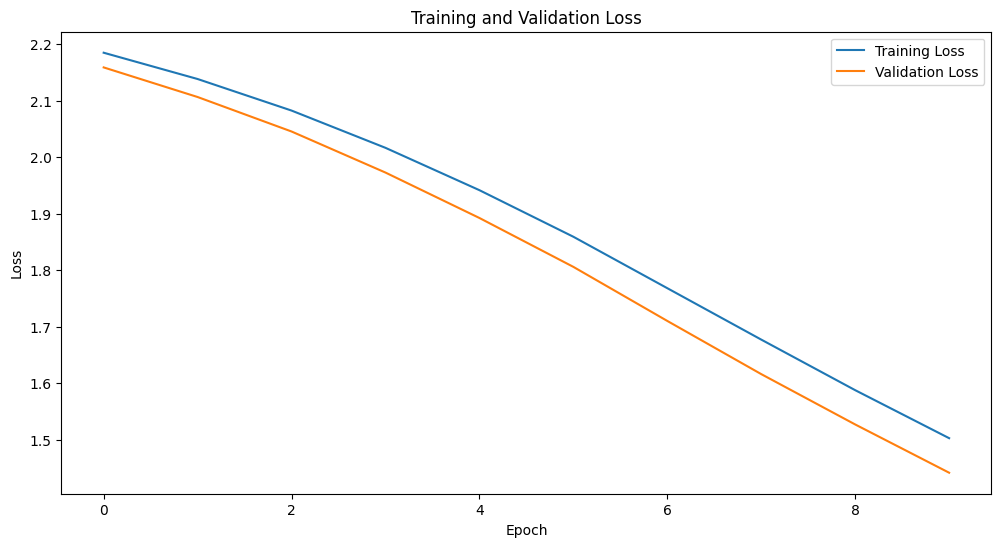

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

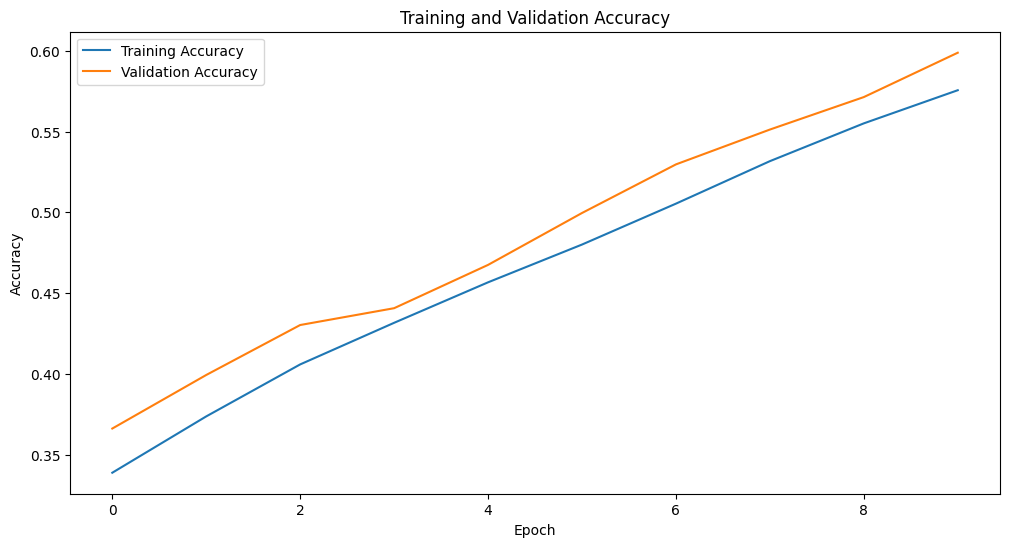

In [37]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Part2.3d-Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
"""
total 22090002 params , 150 epoch batch_size of 200  with 5962 as misclassified images 

training and validation loss are decreasing with each new epoch 

training and validation accuracy are increaing with each new epoch 

"""

